## Identifying and Removing Outliers

In [1]:
%run load_data.py

In [2]:
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
X          DataFrame         Fresh   Milk  Grocer<...>n\n[440 rows x 6 columns]
Z          DataFrame            Fresh      Milk  <...>n\n[440 rows x 6 columns]
Z_bc       DataFrame            Fresh      Milk  <...>n\n[440 rows x 6 columns]
Z_log      DataFrame            Fresh      Milk  <...>n\n[440 rows x 6 columns]
boxcox_X   DataFrame             Fresh       Milk<...>n\n[440 rows x 6 columns]
log_X      DataFrame             Fresh       Milk<...>n\n[440 rows x 6 columns]


In [3]:
%matplotlib inline

To identify outliers in the data, we will use what is [the Tukey Method](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/). 

- leverages the Interquartile Range 
- isn’t dependent on distributional assumptions 
- ignores the mean and standard deviation
- making it resistant to being influenced by the extreme values in the range

**Tukey's Method:** look for points that are more than 1.5 times the Inter-quartile range above the third quartile or below the first quartile.

In [9]:
def feature_outliers(dataframe, col, param=1.5):
    Q1 = np.percentile(dataframe[col], 25)
    Q3 = np.percentile(dataframe[col], 75)
    tukey_window = param*(Q3-Q1)
    less_than_Q1 = (dataframe[col] < Q1 - tukey_window)
#     print(less_than_Q1)
    greater_than_Q3 = (dataframe[col] > Q3 + tukey_window)
    tukey_mask = (less_than_Q1 | greater_than_Q3)
    return dataframe.loc[tukey_mask]


In [10]:
feature_outliers(X, 'Grocery')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
28,4113,20484,25957,1158,8604,5206
43,630,11095,23998,787,9529,72
47,44466,54259,55571,7782,24171,6465
49,4967,21412,28921,1798,13583,1163
56,4098,29892,26866,2616,17740,1340
61,35942,38369,59598,3254,26701,2017
65,85,20959,45828,36,24231,1423
77,12205,12697,28540,869,12034,1009
85,16117,46197,92780,1026,40827,2944
86,22925,73498,32114,987,20070,903


In [14]:
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
X          DataFrame         Fresh   Milk  Grocer<...>n\n[440 rows x 6 columns]
Z          DataFrame            Fresh      Milk  <...>n\n[440 rows x 6 columns]
Z_bc       DataFrame            Fresh      Milk  <...>n\n[440 rows x 6 columns]
Z_log      DataFrame            Fresh      Milk  <...>n\n[440 rows x 6 columns]
boxcox_X   DataFrame             Fresh       Milk<...>n\n[440 rows x 6 columns]
log_X      DataFrame             Fresh       Milk<...>n\n[440 rows x 6 columns]


In [21]:
print("X outliers")
for col in X.columns:
    print(col, feature_outliers(X, col).shape)
print()
print("Z outliers")
for col in Z.columns:
    print(col, feature_outliers(Z, col).shape)
print()
print("Z_log outliers")
for col in Z_log.columns:
    print(col, feature_outliers(Z_log, col).shape)
print()
print("Z_bc outliers")
for col in Z_bc.columns:
    print(col, feature_outliers(Z_bc, col).shape)

X outliers
Fresh (20, 6)
Milk (28, 6)
Grocery (24, 6)
Frozen (43, 6)
Detergents_Paper (30, 6)
Delicatessen (27, 6)

Z outliers
Fresh (20, 6)
Milk (28, 6)
Grocery (24, 6)
Frozen (43, 6)
Detergents_Paper (30, 6)
Delicatessen (27, 6)

Z_log outliers
Fresh (16, 6)
Milk (4, 6)
Grocery (2, 6)
Frozen (10, 6)
Detergents_Paper (2, 6)
Delicatessen (14, 6)

Z_bc outliers
Fresh (1, 6)
Milk (2, 6)
Grocery (2, 6)
Frozen (8, 6)
Detergents_Paper (0, 6)
Delicatessen (11, 6)


What if we count the rows that show up as an outlier more than once?

In [22]:
from collections import Counter

In [23]:
def multiple_outliers(dataframe, count=2):
    raw_outliers = []
    for col in dataframe:
        outlier_df = feature_outliers(dataframe, col)
        raw_outliers += list(outlier_df.index)

    outlier_count = Counter(raw_outliers)
    outliers = [k for k,v in outlier_count.items() if v >= count]
    return outliers

In [24]:
len(multiple_outliers(X))

41

In [25]:
len(multiple_outliers(Z))

41

In [26]:
len(multiple_outliers(Z_log))

5

In [27]:
len(multiple_outliers(Z_bc))

2

In [30]:
z_log_outlier_indices = multiple_outliers(Z_log)

In [29]:
multiple_outliers(Z_bc)

[154, 183]

In [31]:
z_bc_outlier_indices = multiple_outliers(Z_bc)

In [32]:
Z_log_rmo = Z_log.drop(z_log_outlier_indices)

In [33]:
Z_bc_rmo = Z_bc.drop(z_bc_outlier_indices)

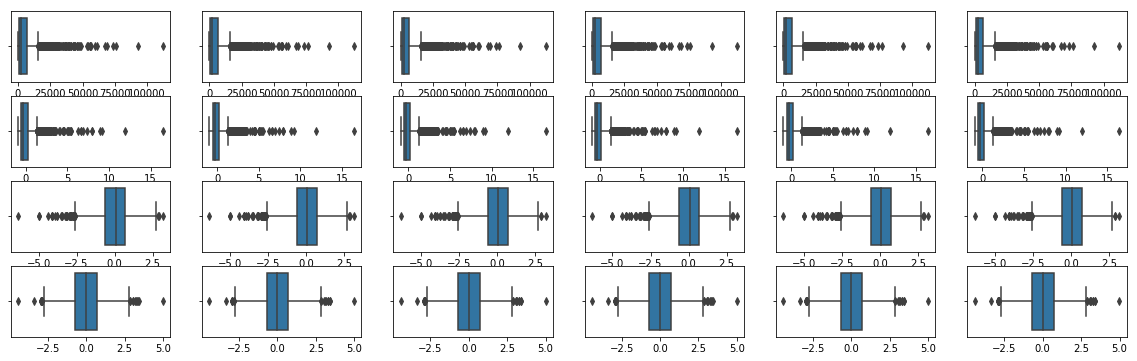

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

_, ax = plt.subplots(4,6,figsize=(20,6))

for i, df in enumerate([X, Z, Z_log, Z_bc]):
    for j, col in enumerate(X.columns):
        sns.boxplot(df, ax=ax[i][j])